# A Comprehensive Guide to Pandas for Time Series Analysis
This is the first Notebook of a series to better understand how to work with Pandas. 

Josep Ferrer - Analytics Engineer & Technical Writer
[databites.tech](databites-tech)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Getting the Data
The first step is getting the data. We will be using the following [Daily Climate Time series](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data) from Kaggle with the following variables. 

The dataset "Daily Climate Time Series Data" on Kaggle provides daily weather observations for Delhi, India, from January 1, 2013, to April 24, 2017. It includes the following variables:

- **date:** The specific day of the observation, formatted as YYYY-MM-DD.
- **meantemp:** The average temperature of the day, calculated from multiple 3-hour interval readings, measured in degrees Celsius.
- **humidity:** The amount of water vapor in the air, expressed as a percentage.
- **wind_speed:** The speed of the wind, measured in kilometers per hour (km/h).
- **meanpressure:** The average atmospheric pressure for the day, measured in hectopascals (hPa).

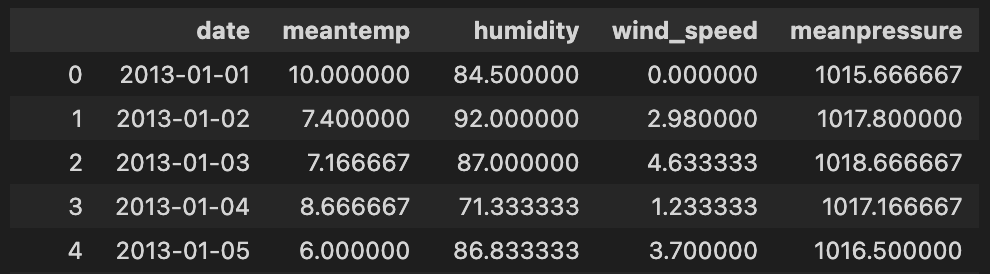

## Step 1: Install the Kaggle API
Ensure the Kaggle Python API is installed in your environment. Run:

In [2]:
!pip install kaggle


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


## Step 2: Locate Your kaggle.json File
Ensure your kaggle.json file is in a secure location on your system (e.g., ../.keys/kaggle.json). 
This file contains your Kaggle username and API key for authentication.

## Step 3: Set Up Your kaggle.json File
Use Python to set up your Kaggle credentials for the API.
- Read the kaggle.json file from its current location.
- Copy it to the default location where the Kaggle API expects it: ~/.kaggle/kaggle.json.
- Set appropriate permissions for security.

In [3]:
import os
import json

# Path to your kaggle.json file
kaggle_json_path = "../.keys/kaggle.json"  # Adjust if your file is in a different folder

# Read the kaggle.json file
with open(kaggle_json_path, "r") as f:
    kaggle_creds = json.load(f)

# Ensure the ~/.kaggle directory exists
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Write the credentials to the default location
kaggle_target_path = os.path.expanduser("~/.kaggle/kaggle.json")
with open(kaggle_target_path, "w") as f:
    json.dump(kaggle_creds, f)

# Set permissions to secure the file
os.chmod(kaggle_target_path, 0o600)

## Step 4: Download the Dataset
Use the Kaggle API to download the dataset to your working directory:

In [4]:
!kaggle datasets download -d sumanthvrao/daily-climate-time-series-data

Dataset URL: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
License(s): CC0-1.0
daily-climate-time-series-data.zip: Skipping, found more recently modified local copy (use --force to force download)


## Step 5: Extract the Dataset
Unzip the downloaded file into a new folder for easier access:

In [5]:
import zipfile

# Define the ZIP file and the extraction folder
dataset_zip = "daily-climate-time-series-data.zip"
extracted_folder = "time_series_dataset"

# Create the folder if it doesn't exist
os.makedirs(extracted_folder, exist_ok=True)

# Extract the dataset
with zipfile.ZipFile(dataset_zip, "r") as zip_ref:
    zip_ref.extractall(extracted_folder)

print(f"Dataset downloaded and extracted to: {extracted_folder}")

Dataset downloaded and extracted to: time_series_dataset


## Step 6: Load the Dataset
Now that the dataset is extracted, you can load the files into a pandas DataFrame for analysis. For example:

In [6]:
import pandas as pd

# Adjust the filename if necessary
data_file = "time_series_dataset/DailyDelhiClimateTrain.csv"
df = pd.read_csv(data_file)
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [7]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


# Using PANDAS for Time Series Analytics

## Creating a datetime index
Now we have the data loaded, we want to fix it a bit to make it more useful. 

First we will change the index from its current state as a sequence of integers to the more functional pandas.DatetimeIndex which is based on Python datetime objects.
This will allow us to order our data by its main indicator: Time!

We use the `pandas.to_datetime()` function to make sure our column date presents the proper format and then assign it directly to the .index property of df. 

In [8]:
df.index = pd.to_datetime(df["date"])
#df = df.drop(columns=["date"]) -> We can drop the date column if needed. 
df

,date,meantemp,humidity,wind_speed,meanpressure
date,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
2016-12-28,2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,2016-12-30,14.095238,89.666667,6.266667,1017.904762


## Plotting dataframe contents
We can easily use the plot method of Pandas to generate a chart for all variables within the dataframe. 

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

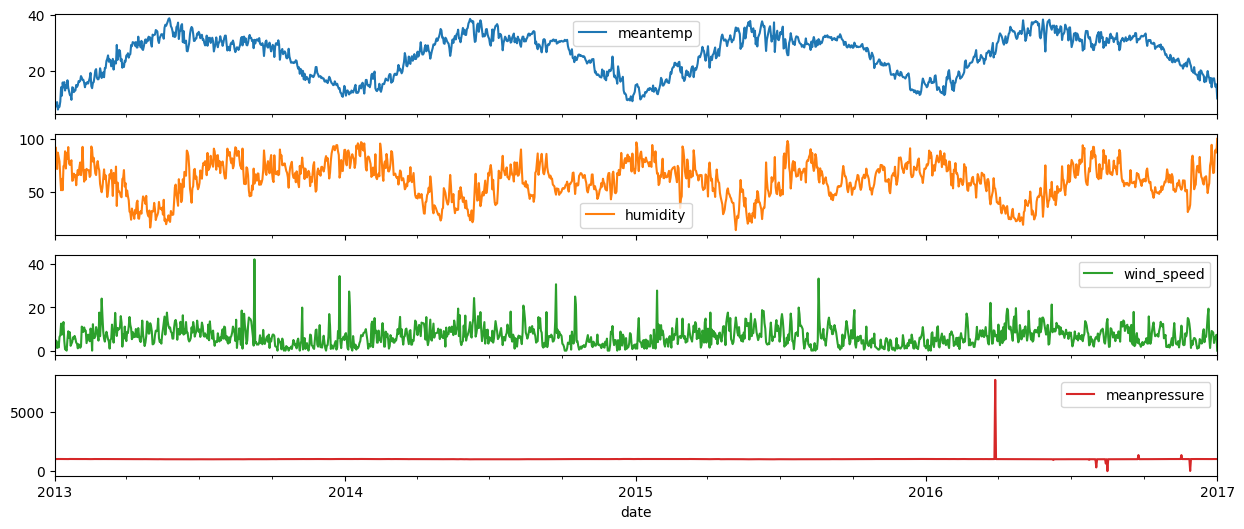

In [9]:
#df.plot(figsize=(15,4))
df.plot(subplots=True, figsize=(15,6))
#df.plot(y=["meantemp", "humidity", "wind_speed"], figsize=(15,4))

## Resampling, rolling calculations, and differencing
To reduce the noise in the data, we can smooth it. There are various ways to do this and so there is a choice to be made about the method to use and the degree of smoothing required. 

### RESAMPLING
Resampling involves changing the frequency of your time-series data. This can be done either to a higher frequency (upsampling) or a lower frequency (downsampling).


What we are going to do now is to extract a dataframe with the columns we are interested in with (meantemp), produce a week-based “resampler” object, which is then reduced to the new weekly time series by taking medians over each year interval.

/var/folders/5h/h364vcws335c872gj8pv3jvm0000gn/T/ipykernel_92909/3645432050.py:1: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  df[["meantemp"]].resample("1w").median().plot(figsize=(15,4))


<Axes: xlabel='date'>

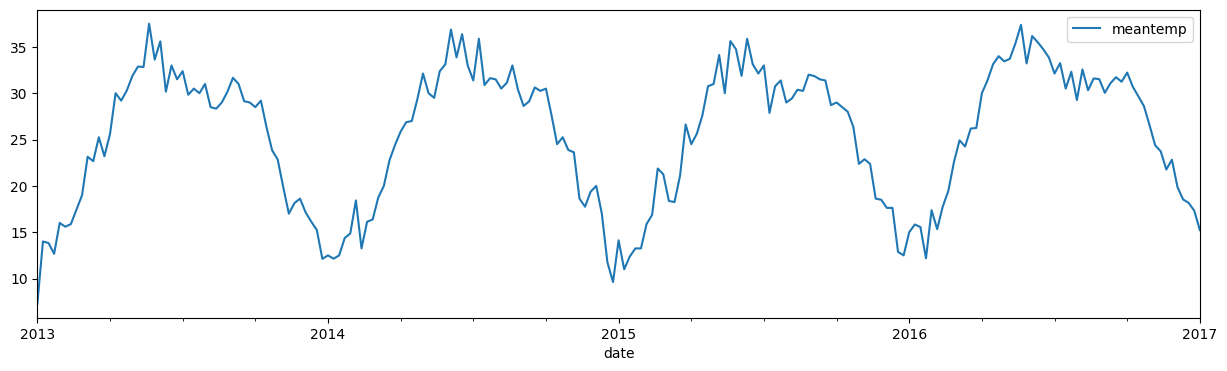

In [10]:
df[["meantemp"]].resample("1w").median().plot(figsize=(15,4))

We can repeat the same procedure with a monthly-resample. 

/var/folders/5h/h364vcws335c872gj8pv3jvm0000gn/T/ipykernel_92909/2671984910.py:1: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[["meantemp"]].resample("1m").median().plot(figsize=(15,4))


<Axes: xlabel='date'>

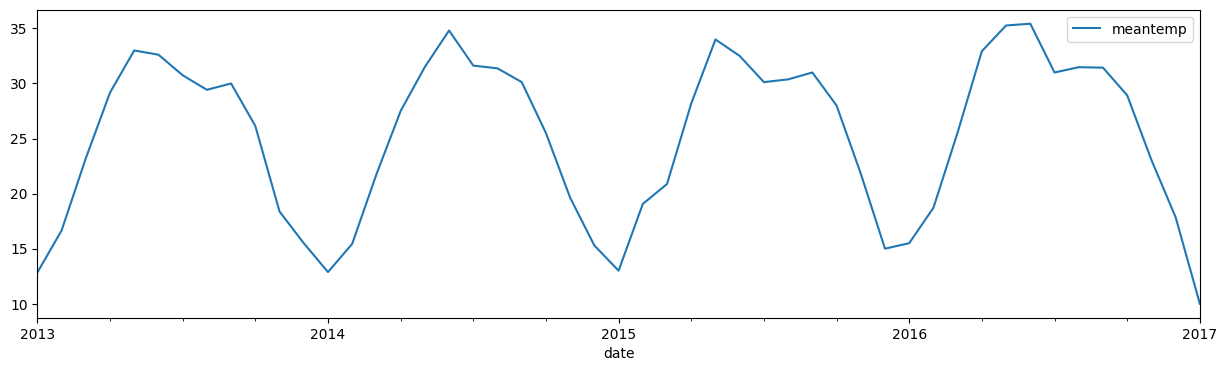

In [11]:
df[["meantemp"]].resample("1m").median().plot(figsize=(15,4))

### ROLLING
Rolling involves applying a calculation over a moving window of a fixed size. It’s often used for smoothing or calculating running statistics. So now we can generate a 31-days moving window and roll our data to smooth the noise and see clearly the time pattern. 

<Axes: xlabel='date'>

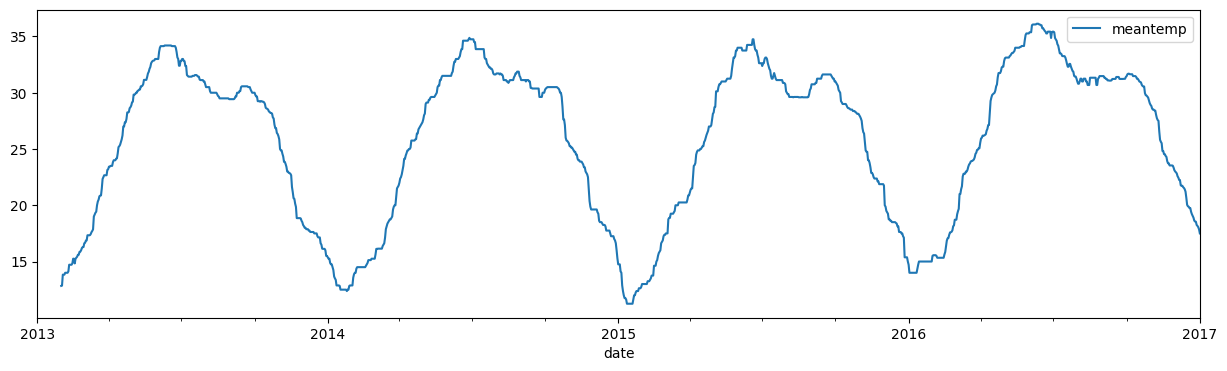

In [12]:
df[["meantemp"]].rolling(31).median().plot(figsize=(15,4))

## Identifying periodicity and correlation
We can see by eye that there is an approximately 1 year (12 months) cycle in our data. However... how to make sure of this?

A handy high level tool to identify this periodicity is the autocorrelation plot. This produces an autocorrelation plot: the correlation of a time series with itself at a range of lag times.

An **autocorrelation plot** shows how similar a time series is to its past values. It compares the current data to previous ones at different time steps (lags). If the bars on the plot are tall and outside the dashed lines, it means there’s a pattern or trend. Peaks repeating at regular intervals suggest seasonality. If the bars quickly get small, the data is random or stationary. This plot helps find patterns and decide the best way to model the data.

/var/folders/5h/h364vcws335c872gj8pv3jvm0000gn/T/ipykernel_92909/119945772.py:1: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.plotting.autocorrelation_plot(df["meantemp"].resample("1m").median())


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

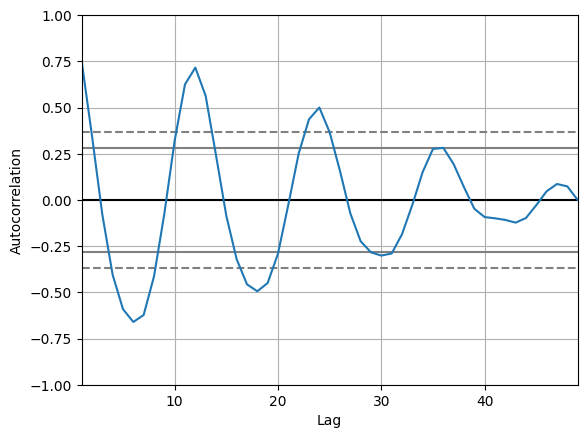

In [13]:
pd.plotting.autocorrelation_plot(df["meantemp"].resample("1m").median())

Autocorrelation measures how a time series relates to its past values at different time steps (lags). The values range between:

- **1:** Perfect positive correlation (high similarity).
- **0:** No correlation (random relationship).
- **-1:** Perfect negative correlation (opposite relationship).
Looking at the plot, we observe two distinct peaks:

A negative peak around lag 6, indicating an inverse relationship at this interval.
A positive peak around lag 12, signifying a repeating pattern.
This pattern strongly suggests a 12-month seasonality, meaning the data cycles annually.

### Splitting and stacking cycles
Since the data exhibits a clear annual cycle, we can "stack" the data by aligning the same days across different years. This allows us to visualize and compare year-to-year patterns more effectively. By plotting the behavior of a selected variable (e.g., mean temperature) against the day of the year for each year, we can uncover variations in seasonal trends, anomalies, or long-term changes.

/var/folders/5h/h364vcws335c872gj8pv3jvm0000gn/T/ipykernel_92909/3122984188.py:17: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  year_data = year_data.resample("1m").median()


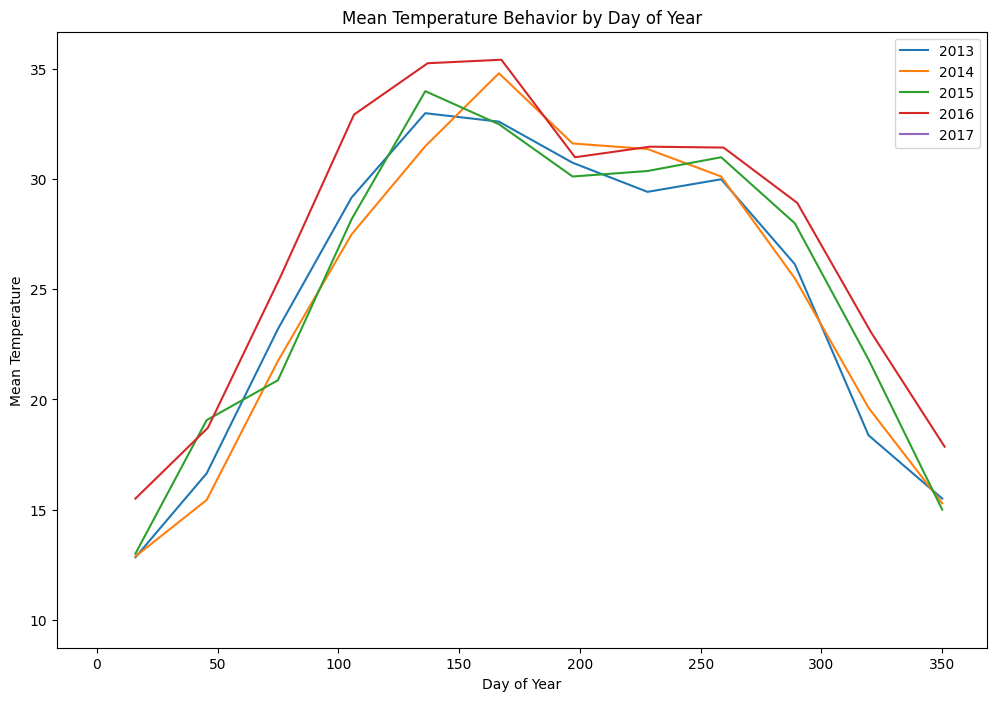

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# If the 'date' column is not already a datetime object, convert it
df['date'] = pd.to_datetime(df['date'])

# Extract the day of the year and year for grouping
df['day_of_year'] = df['date'].dt.dayofyear
df['year'] = df['date'].dt.year

# Plot for a selected variable, e.g., 'meantemp'
plt.figure(figsize=(12, 8))

for year in df['year'].unique():
    year_data = df[df['year'] == year]
    year_data = year_data.resample("1m").median()
    plt.plot(year_data['day_of_year'], year_data['meantemp'], label=f'{year}')

plt.title("Mean Temperature Behavior by Day of Year")
plt.xlabel("Day of Year")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()
